### Outdoor Temperature Preprocessing

The file `LLEC_B665_WS_23_24.xlsx`, published on Zenodo ([DOI: 10.5281/zenodo.14810476](https://doi.org/10.5281/zenodo.14810476)), contains high-resolution measurement data from experimental buildings at the Living Lab Energy Campus (LLEC) during winter 2023–2024. 

For use in our reinforcement learning (RL) framework, we extract the column `temp_amb [°C]`, representing the ambient (outdoor) temperature. The original data is recorded at a 1-minute resolution. To reduce computational complexity and align with the simulation step size, the time series is resampled to 5-minute intervals by computing the mean value for each interval. The resulting smoothed outdoor temperature profile is used as an external input signal in the building control environment.


In [1]:
import os
import pandas as pd  # For loading and processing CSV files
import numpy as np  # Optional: for numerical operations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

folder = "../data"
file = "LLEC_B665_WS_23_24.xlsx"
file_path = os.path.join(folder, file)

# Load Excel file with datetime parsing and index assignment
df = pd.read_excel(file_path, index_col=0, parse_dates=True)

In [2]:
# Optional: rename the index to 'Time' for clarity
df.index.name = "Time"

# Extract ambient (outdoor) temperature
outdoor_temp = df["temp_amb [°C]"]

# Resample to 5-minute intervals using mean aggregation
outdoor_temp_5min = outdoor_temp.resample("5min").mean()
outdoor_temp_5min = outdoor_temp_5min.round(2)

# Display the first entries
print(outdoor_temp_5min.head())

# Save to CSV file
outdoor_temp_5min.to_csv(
    "../data/LLEC_outdoor_temperature_data.csv", index_label="Time"
)

missing_count = outdoor_temp_5min.isna().sum()
print(f"Number of missing values in resampled data: {missing_count}")

Time
2023-12-13 00:00:00    9.70
2023-12-13 00:05:00    9.68
2023-12-13 00:10:00    9.60
2023-12-13 00:15:00    9.60
2023-12-13 00:20:00    9.60
Freq: 5min, Name: temp_amb [°C], dtype: float64
Number of missing values in resampled data: 6052


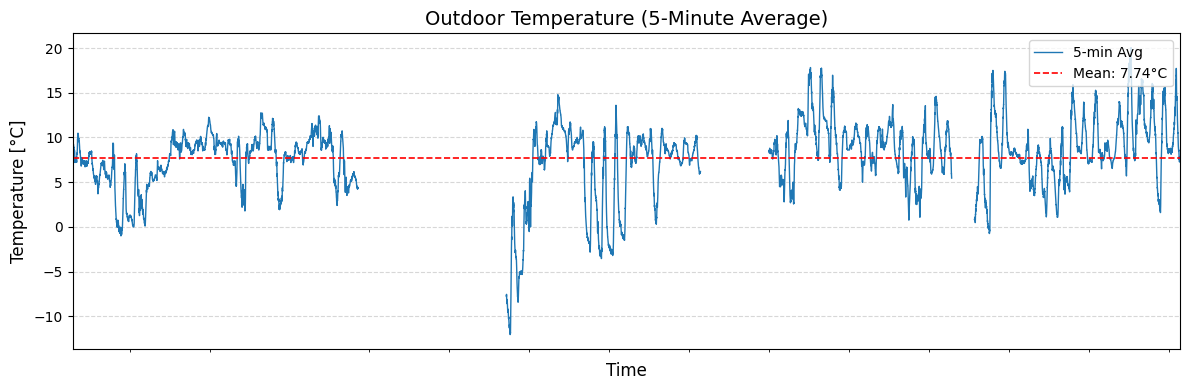

In [3]:
# Compute the average temperature
mean_temp = outdoor_temp_5min.mean()

# Set a larger plot size
plt.figure(figsize=(12, 4))

# Plot the resampled outdoor temperature
outdoor_temp_5min.plot(color="tab:blue", linewidth=1, label="5-min Avg")

# Plot the mean temperature as a horizontal dashed line
plt.axhline(
    y=mean_temp,
    color="red",
    linestyle="--",
    linewidth=1.2,
    label=f"Mean: {mean_temp:.2f}°C",
)

# Title and axis labels
plt.title("Outdoor Temperature (5-Minute Average)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Temperature [°C]", fontsize=12)

# Format x-axis with monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# Show legend
plt.legend(loc="upper right")

# Optional: tighter layout and grid
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

In [4]:
# Drop all NaN values
outdoor_temp_5min_cleaned = outdoor_temp_5min.dropna()

# Reset index to make 'Time' a regular column instead of datetime index
outdoor_temp_5min_cleaned = outdoor_temp_5min_cleaned.reset_index()

# Rename columns for clarity (optional but clean)
outdoor_temp_5min_cleaned.columns = ["Time", "OutdoorTemperature [°C]"]

# Save to CSV without using index
outdoor_temp_5min_cleaned.to_csv(
    "../data/LLEC_outdoor_temperature_data.csv", index=False
)
folder = "../data"
clean_file = "LLEC_outdoor_temperature_data.csv"
clean_file_path = os.path.join(folder, clean_file)
clean_file_path

'../data/LLEC_outdoor_temperature_data.csv'

In [5]:
if clean_file_path.endswith(".csv"):
    df = pd.read_csv(clean_file_path)
    # Change column names for consistency
    df.rename(columns={"OutdoorTemperature [°C]": "temp_amb [°C]"}, inplace=True)
elif clean_file_path.endswith(".xlsx"):
    df = pd.read_excel(clean_file_path, engine="openpyxl")
else:
    raise ValueError("Unsupported file format. Please use .csv or .xlsx")
# Display the first few rows of the cleaned DataFrame
print(clean_file_path)

../data/LLEC_outdoor_temperature_data.csv


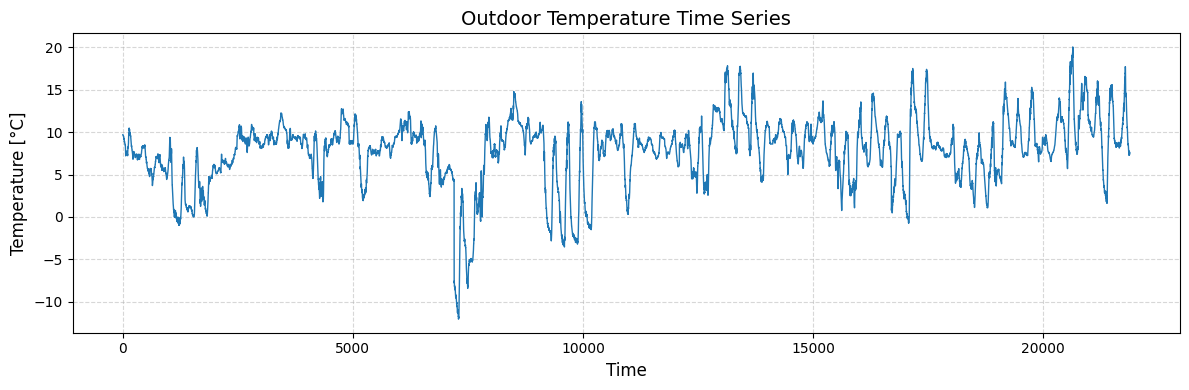

Cleaned and saved: 21884 rows


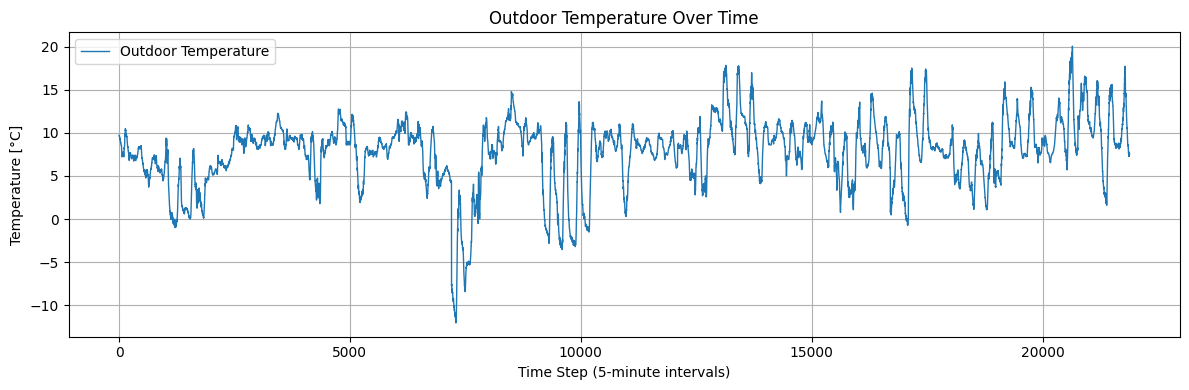

Index(['temp_amb [°C]'], dtype='object')
   temp_amb [°C]
0           9.70
1           9.68
2           9.60
3           9.60
4           9.60


In [6]:
# If ‘Time’ is not yet datetime:
df["Time"] = pd.to_datetime(df["Time"])

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df["temp_amb [°C]"], color="tab:blue", linewidth=1)

# Title and axis labels
plt.title("Outdoor Temperature Time Series", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Temperature [°C]", fontsize=12)

# Optional: grid and layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

df[["temp_amb [°C]"]].to_csv(
    "../data/LLEC_outdoor_temperature_5min_data.csv", index=False
)

# Read the CSV file
df = pd.read_csv("../data/LLEC_outdoor_temperature_5min_data.csv")

# Remove NaN entries from the temperature column
df_clean = df.dropna(subset=["temp_amb [°C]"])

# Reset the index
df_clean.reset_index(drop=True, inplace=True)

# Save the cleaned CSV
df_clean.to_csv("../data/LLEC_outdoor_temperature_5min_data.csv", index=False)

print(f"Cleaned and saved: {df_clean.shape[0]} rows")

# Read the cleaned CSV file
df = pd.read_csv("../data/LLEC_outdoor_temperature_5min_data.csv")

# Plot the temperature time series
plt.figure(figsize=(12, 4))
plt.plot(df["temp_amb [°C]"], label="Outdoor Temperature", linewidth=1)

# Plot styling
plt.title("Outdoor Temperature Over Time")
plt.xlabel("Time Step (5-minute intervals)")
plt.ylabel("Temperature [°C]")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

df = pd.read_csv("../data/LLEC_outdoor_temperature_5min_data.csv")
print(df.columns)  # displays all column names
print(df.head())  # first lines to recognize the timestamp

In [7]:
# Define paths to synthetic and measured data
results_dir_synthetic = (
    "../results/temperature/synthetic_temp_data"  # synthetic outdoor temperature data
)
results_dir_measured = (
    "../results/temperature/real_temp_data"  # measured outdoor temperature data
)

# Valid result file suffixes
valid_suffixes = ("_best.csv", "PID_Control.csv", "PI_Control.csv", "Fuzzy_Control.csv")


# Load results from one directory
def load_results_from_directory(directory):
    results_local = {}
    avg_rewards_local = {}

    if os.path.isdir(directory):
        for filename in sorted(os.listdir(directory)):
            if filename.endswith(valid_suffixes) or (
                "MPC_Control" in filename and filename.endswith(".csv")
            ):
                file_path = os.path.join(directory, filename)
                model_name = (
                    filename.replace("eval_", "")
                    .replace(".csv", "")
                    .replace("_", " ")
                    .strip()
                )
                try:
                    df = pd.read_csv(file_path, engine="python", on_bad_lines="error")
                    df.columns = df.columns.str.strip()
                    avg_reward = df.groupby("episode")["reward"].sum().mean()
                    results_local[model_name] = df
                    avg_rewards_local[model_name] = avg_reward
                except Exception as e:
                    print(f"Error loading '{filename}' from '{directory}': {e}")
    else:
        print(f"Directory '{directory}' does not exist.")

    return results_local, avg_rewards_local


# Load synthetic and measured results
results_synthetic, avg_rewards_synthetic = load_results_from_directory(
    results_dir_synthetic
)
results_measured, avg_rewards_measured = load_results_from_directory(
    results_dir_measured
)

In [8]:
# Select first model (for debugging/inspection)
first_model_synthetic = next(iter(results_synthetic))
first_model_measured = next(iter(results_measured))
print("First model in synthetic results:", first_model_synthetic)
print("First model in measured results:", first_model_measured)

# Group temperature data for baseline plotting
grouped_synthetic = results_synthetic[first_model_synthetic].groupby("time_step")
grouped_measured = results_measured[first_model_measured].groupby("time_step")

# Extract synthetic reference temperature profile
target_temperature_schedule = grouped_synthetic["T_set"].mean().values
t_out_origin_schedule_synthetic = grouped_synthetic["T_out"].mean()
t_out_origin_schedule_measured = grouped_measured["T_out"].mean()
target_temperature = target_temperature_schedule.mean()


# Normalize model labels
def rename_models(results_dict):
    renamed = {}
    for key, df in results_dict.items():
        if "algorithm" in df.columns and "seed" in df.columns:
            model_label = f"{df['algorithm'].iloc[0].upper()}_seed{df['seed'].iloc[0]}"
        else:
            model_label = key
        renamed[model_label] = df
    return renamed


# Rename model keys
results_renamed_synthetic = rename_models(results_synthetic)
results_renamed_measured = rename_models(results_measured)

# Select desired model
desired_model = "PPO_seed58"
results_renamed_synthetic = {
    k: v for k, v in results_renamed_synthetic.items() if k == desired_model
}
results_renamed_measured = {
    k: v for k, v in results_renamed_measured.items() if k == desired_model
}

# Generate consistent color mapping per episode
selected_df = results_renamed_synthetic[desired_model]
unique_episodes = sorted(selected_df["episode"].unique())
episode_colors = sns.color_palette("Blues", n_colors=len(unique_episodes))
episode_color_map = {ep: episode_colors[i] for i, ep in enumerate(unique_episodes)}


# Axis range collector
def collect_axis_range(results_dict):
    all_time_steps = []
    all_T_out_values = []
    for df in results_dict.values():
        for episode in df["episode"].unique():
            df_ep = df[df["episode"] == episode].groupby("time_step")
            all_time_steps.extend(df_ep["time_step"].mean().values.tolist())
            all_T_out_values.extend(df_ep["T_out_measurement"].mean().values.tolist())
    return all_time_steps, all_T_out_values


# Collect data for both variants
time_steps_syn, T_out_syn = collect_axis_range(results_renamed_synthetic)
time_steps_meas, T_out_meas = collect_axis_range(results_renamed_measured)

# Axis limits
x_min = min(time_steps_syn + time_steps_meas)
x_max = max(time_steps_syn + time_steps_meas)
y_min = min(min(T_out_syn), min(T_out_meas), min(target_temperature_schedule))
y_max = max(max(T_out_syn), max(T_out_meas), max(target_temperature_schedule))
y_margin = 0.1 * (y_max - y_min) if y_max != y_min else 1.0
y_lower, y_upper = y_min - y_margin, y_max + y_margin

First model in synthetic results: T01 a2c best
First model in measured results: T01 Fuzzy Control


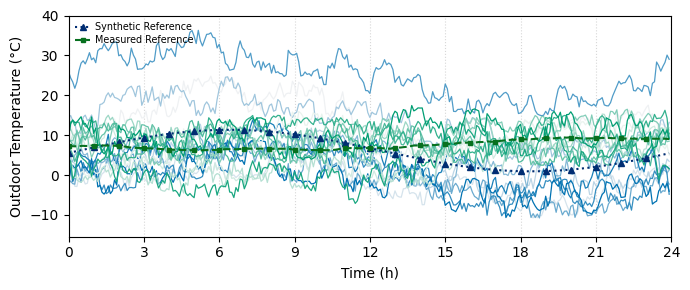

Fig.4.
Comparison of training and evaluation temperature profiles for reinforcement learning control.
Synthetic training data (solid blue lines) are contrasted with real-world evaluation data (dashed green lines).
Reference profiles are highlighted in black with markers.


In [9]:
# Baseline temperature profiles
t_out_origin_schedule_synthetic = grouped_synthetic["T_out"].mean()
t_out_origin_schedule_measured = grouped_measured["T_out"].mean()

# Define color palettes for synthetic and measured
colors_synthetic = sns.color_palette("Blues", n_colors=len(unique_episodes))
colors_measured = sns.color_palette("Oranges", n_colors=len(unique_episodes))
# Define colors
COLOR_SCHEME = {
    "synthetic": "#0072B2",  # Dark blue
    "measured": "#009E73",  # Dark green
    "blue": "#002D72",  # navy
    "green": "#07701F",  # medium green
}
colors_synthetic = sns.light_palette(
    COLOR_SCHEME["synthetic"], n_colors=len(unique_episodes)
)
colors_measured = sns.light_palette(
    COLOR_SCHEME["measured"], n_colors=len(unique_episodes)
)

episode_color_map_syn = {
    ep: colors_synthetic[i] for i, ep in enumerate(unique_episodes)
}
episode_color_map_meas = {
    ep: colors_measured[i] for i, ep in enumerate(unique_episodes)
}


# Plotting function with only reference legend entries
def plot_combined(ax, synthetic_dict, measured_dict, ref_syn, ref_meas):
    # Plot synthetic episodes
    for df in synthetic_dict.values():
        for episode in df["episode"].unique():
            df_ep = df[df["episode"] == episode].groupby("time_step")
            time_steps = df_ep["time_step"].mean().values
            T_out = df_ep["T_out_measurement"].mean().values
            ax.plot(
                time_steps, T_out, color=episode_color_map_syn[episode], linewidth=0.9
            )

    # Plot measured episodes
    for df in measured_dict.values():
        for episode in df["episode"].unique():
            df_ep = df[df["episode"] == episode].groupby("time_step")
            time_steps = df_ep["time_step"].mean().values
            T_out = df_ep["T_out_measurement"].mean().values
            ax.plot(
                time_steps, T_out, color=episode_color_map_meas[episode], linewidth=0.9
            )

    # Overlay reference curves with legend entries
    ax.plot(
        ref_syn.index,
        ref_syn.values,
        color=COLOR_SCHEME["blue"],
        linestyle=":",
        linewidth=1.5,
        marker="^",
        markersize=4,
        markevery=12,
        label="Synthetic Reference",
    )

    ax.plot(
        ref_meas.index,
        ref_meas.values,
        color=COLOR_SCHEME["green"],
        linestyle="--",
        linewidth=1.5,
        marker="s",
        markersize=3,
        markevery=12,
        label="Measured Reference",
    )
    # Axis formatting
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_lower, 40)
    ax.set_xlabel("Time (h)")
    ax.set_ylabel("Outdoor Temperature (°C)")
    ax.grid(True, axis="x", linestyle=":", alpha=0.5)

    # X-Ticks: 0–24h in 3h steps
    xticks_raw = np.arange(0, 25, 3)
    ax.set_xticks(xticks_raw * 12)
    ax.set_xticklabels(xticks_raw)

    # Legend inside the plot, top-left
    ax.legend(
        loc="upper left",
        fontsize="x-small",
        frameon=False,
        handlelength=1.5,
        handletextpad=0.5,
        borderaxespad=0.3,
        labelspacing=0.3,
    )


# Create figure and axis
fig, ax = plt.subplots(figsize=(7.0, 3.0))

# Draw plot
plot_combined(
    ax,
    synthetic_dict=results_renamed_synthetic,
    measured_dict=results_renamed_measured,
    ref_syn=t_out_origin_schedule_synthetic,
    ref_meas=t_out_origin_schedule_measured,
)

plt.tight_layout()
plt.show()
print("Fig.4.")
print(
    "Comparison of training and evaluation temperature profiles for reinforcement learning control."
)
print(
    "Synthetic training data (solid blue lines) are contrasted with real-world evaluation data (dashed green lines)."
)
print("Reference profiles are highlighted in black with markers.")

In [10]:
# -*- coding: utf-8 -*-
"""
Exports a complete LaTeX figure block as pgfplots/TikZ.

Assuming:
    results_renamed_synthetic / measured
    t_out_origin_schedule_synthetic / measured
    episode_color_map_syn / meas
    x_min, x_max, y_lower
"""

import re
import textwrap


# --------------------------------------------------------------------
#  Help functions
# --------------------------------------------------------------------
def _to_rgb_frac(color):
    """'#RRGGBB' oder (r,g,b) → (0–1, 0–1, 0–1)"""
    if isinstance(color, (tuple, list)):
        r, g, b = (float(x) for x in color[:3])
        return (r, g, b) if max(r, g, b) <= 1 else (r / 255, g / 255, b / 255)
    color = color.lstrip("#")
    return tuple(int(color[i : i + 2], 16) / 255 for i in (0, 2, 4))


_sanitize = lambda s: re.sub(r"\W+", "", str(s))  # LaTeX-tauglich


def make_tikz(
    synthetic_dict,
    measured_dict,
    ref_syn,
    ref_meas,
    episode_color_map_syn,
    episode_color_map_meas,
    x_min,
    x_max,
    y_lower,
):
    xt_raw = np.arange(0, 25, 3)
    xticks = ",".join(str(int(t * 12)) for t in xt_raw)
    xtlabels = ",".join(str(int(t)) for t in xt_raw)

    tikz, seen = [], {}

    def _add_color(name, col):
        r, g, b = map(lambda x: round(x, 6), _to_rgb_frac(col))
        key = (r, g, b)
        if key not in seen:
            tikz.append(rf"\definecolor{{{name}}}{{rgb}}{{{r:.4f},{g:.4f},{b:.4f}}}")
            seen[key] = True

    # Register colors
    for ep, col in episode_color_map_syn.items():
        _add_color(f"syn{_sanitize(ep)}", col)
    for ep, col in episode_color_map_meas.items():
        _add_color(f"meas{_sanitize(ep)}", col)
    _add_color("reference", "#FF0000")
    _add_color("blue", "#002D72")
    _add_color("green", "#07701F")

    # Axis-Header (with desired options)
    tikz += [
        r"\begin{tikzpicture}",
        r"  \begin{axis}[",
        r"    width=0.45\textwidth,",
        r"    height=3.5cm,",
        r"    xlabel={Time (h)},",
        r"    ylabel={Temperature (°C)},",
        rf"    xmin={x_min},",
        rf"    xmax={x_max+1.1},",
        rf"    ymin=-12, ymax=40,",
        # rf"    ymin={y_lower}, ymax={y_lower},",
        r"    ytick={-10,0, 10, 20, 30},",
        r"    xtick={0,36,72,108,144,180,216,252,288},",
        r"    xticklabels={0,3,6,9,12,15,18,21,24},",
        r"    grid=both,",
        r"    tick label style={font=\small},",
        r"    label style={font=\small},",
        r"    %label style={font=\footnotesize},",
        r"    legend style={",
        r"      at={(0.5,1.01)},",
        # Marker significantly larger, line slightly stretched
        r"      legend image post style={scale=1.0},",
        r"      anchor=south,",
        r"      legend columns=2,",
        # r"      font=\footnotesize,",               # alternative font size
        r"      font=\small,",
        r"      draw=none",
        r"    }",
        r"  ]",
    ]
    # Synthetic curves
    for df in synthetic_dict.values():
        for ep in df["episode"].unique():
            grp = (
                df[df["episode"] == ep]
                .groupby("time_step")[["time_step", "T_out_measurement"]]
                .mean()
            )
            coords = " ".join(
                f"({x},{y})" for x, y in zip(grp.index, grp["T_out_measurement"])
            )
            tikz.append(
                rf"    \addplot [color=syn{_sanitize(ep)}, line width=0.9pt, forget plot] coordinates {{{coords}}};"
            )

    # Measured curves
    for df in measured_dict.values():
        for ep in df["episode"].unique():
            grp = (
                df[df["episode"] == ep]
                .groupby("time_step")[["time_step", "T_out_measurement"]]
                .mean()
            )
            coords = " ".join(
                f"({x},{y})" for x, y in zip(grp.index, grp["T_out_measurement"])
            )
            tikz.append(
                rf"    \addplot [color=meas{_sanitize(ep)}, line width=0.9pt, forget plot] coordinates {{{coords}}};"
            )

    #  Reference curves ---------------------------------------------------
    coords_syn = " ".join(f"({x},{y})" for x, y in zip(ref_syn.index, ref_syn))
    coords_meas = " ".join(f"({x},{y})" for x, y in zip(ref_meas.index, ref_meas))

    tikz.append(
        r"    \addplot [color=blue, dotted, line width=0.9pt,"
        r"               mark=triangle*, mark size=1.3pt, mark options={solid},"
        r"               mark repeat=12, mark phase=13] "
        rf"coordinates {{{coords_syn}}};"
        r"\addlegendentry{Synthetic (Training)}"
    )

    tikz.append(
        r"    \addplot [color=green, dashed, line width=0.9pt,"
        r"               mark=square*, mark size=1.3pt, mark options={solid},"
        r"               mark repeat=12, mark phase=13] "
        rf"coordinates {{{coords_meas}}};"
        r"\addlegendentry{Measured (Evaluation)}"
    )

    tikz += [r"  \end{axis}", r"\end{tikzpicture}"]
    return "\n".join(tikz)


# --------------------------------------------------------------------
#  Version: Print figure block
# --------------------------------------------------------------------
if __name__ == "__main__":
    tikz_block = make_tikz(
        synthetic_dict=results_renamed_synthetic,
        measured_dict=results_renamed_measured,
        ref_syn=t_out_origin_schedule_synthetic,
        ref_meas=t_out_origin_schedule_measured,
        episode_color_map_syn=episode_color_map_syn,
        episode_color_map_meas=episode_color_map_meas,
        x_min=x_min,
        x_max=x_max,
        y_lower=y_lower,
    )

    figure_env = r"""\begin{figure}
  \centering
%s
  \caption{Temperature data with noise-free synthetic (red triangles) and measured (red squares) references, and corresponding Wiener-noisy training (blue) and evaluation (green).}
  \label{fig:temp_profiles}
\end{figure}""" % textwrap.indent(
        tikz_block, "  "
    )
    print("\n\n%---------- BEGIN TIKZ  FIG 03 ----------\n")
    print(figure_env)
    print("\n%----------- END TIKZ FIG 03 -----------")



%---------- BEGIN TIKZ  FIG 03 ----------

\begin{figure}
  \centering
  \definecolor{syn1}{rgb}{0.9389,0.9440,0.9520}
  \definecolor{syn2}{rgb}{0.8358,0.8894,0.9241}
  \definecolor{syn3}{rgb}{0.7327,0.8348,0.8962}
  \definecolor{syn4}{rgb}{0.6260,0.7783,0.8673}
  \definecolor{syn5}{rgb}{0.5229,0.7238,0.8395}
  \definecolor{syn6}{rgb}{0.4161,0.6673,0.8106}
  \definecolor{syn7}{rgb}{0.3130,0.6127,0.7827}
  \definecolor{syn8}{rgb}{0.2062,0.5562,0.7538}
  \definecolor{syn9}{rgb}{0.1031,0.5016,0.7259}
  \definecolor{syn10}{rgb}{0.0000,0.4471,0.6980}
  \definecolor{meas1}{rgb}{0.9156,0.9525,0.9342}
  \definecolor{meas2}{rgb}{0.8151,0.9159,0.8812}
  \definecolor{meas3}{rgb}{0.7146,0.8794,0.8281}
  \definecolor{meas4}{rgb}{0.6104,0.8415,0.7732}
  \definecolor{meas5}{rgb}{0.5099,0.8050,0.7201}
  \definecolor{meas6}{rgb}{0.4058,0.7671,0.6651}
  \definecolor{meas7}{rgb}{0.3052,0.7306,0.6121}
  \definecolor{meas8}{rgb}{0.2011,0.6927,0.5571}
  \definecolor{meas9}{rgb}{0.1005,0.6562,0.5040}
  \de

In [11]:
print("Successfully preprocessed outdoor temperature data.")

Successfully preprocessed outdoor temperature data.
